## Overview Exercise

|null hypotheseis | alt Hypothesis | true pos | true neg | type I | type II|
|:-------------- | :------------ | :----: | :----: | :----: | :----:|
|Avg latency is the same for the new service providers | Avg altency has changed on the new service provider | Avg latency b/w providers is different | There is no statistically significant difference between provider latencies | We determine there is a difference in avg latency b/w providers, but there isn't | We determine there is not a difference in avg latency b/w providers, but there is |
|Online sales stayed the same after the website redesign |Online sales increased or decreased after the website redesign|There was a statistically significant change in sales after the website redesign|There was not a statistically significant change in sales after the website redesign|We determine there was a change in sales after the redesign, but there wasn't a statistically significant one|We determine there was not a change in sales after the redesign, but there was a statistically significant one|
|Sales have stayed the same after the TV ad|Sales have changed after the TV ad|There is no statistically significant change in sales after the TV ad|There is a statistically significant change in sales after the TV ad|We determine there is a change in sales after the TV ad, but there isn't | We determine there is not a change in sales after the TV ad, but there is.|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt

In [36]:
def stats_result(p,α,null_h):
    print(f'The null hypothesis was: {null_h}\n')
    
    if p < α: print(f"We reject the null hypothesis, p = {p}")
    else: print(f"We accept the null hypothesis, p = {p}")
    return None

## T-Test Exercises

In [25]:
#1) Ace Realty
#Given info
o1_n = 40
o1_mn = 90
o1_stdv = 15

o2_n = 50
o2_mn = 100
o2_stdv = 20

α = .05

null_h = "The two offices take the same time to sell homes"

In [4]:
#std dev don't seem that close to me (25-33% diff)
#What does levine think?
#DO THIS LATER

In [26]:
#two sample, looking at difference (two tails)
#independed t-test
t, p = stats.ttest_ind_from_stats(o1_mn,o1_stdv,o1_n,o2_mn,o2_stdv,o2_n,equal_var=False)

In [27]:
stats_result(p,α,null_h)


The null hypothesis was: The two offices take the same time to sell homes

We reject the null hypothesis, p = 0.00811206270346016


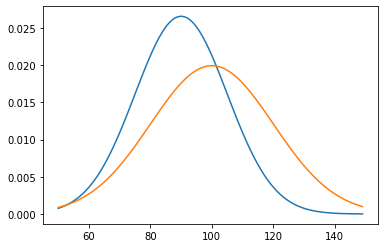

In [31]:
#let's graph for 'fun'
x = np.arange(50,150)
y1 = stats.norm(o1_mn,o1_stdv).pdf(x) 
y2 = stats.norm(o2_mn,o2_stdv).pdf(x)

plt.plot(x,y1,x,y2)

In [7]:
#2) MPG dataset
df = data('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


<AxesSubplot:xlabel='year', ylabel='Count'>

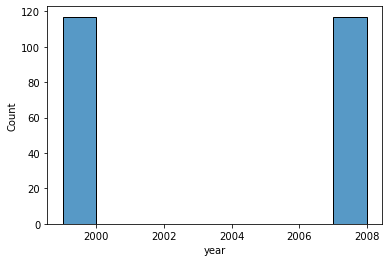

In [8]:
sns.histplot(data=df,x='year')

In [41]:
#2a) is there a difference in fuel-efficiency from cars in 2008 than 1999
null_h = "There is no difference in fuel-efficiency from cars in 2008 and 1999"
#set up new 'average mpg column' - did this b/c i just assume that's what they want.
#Used EPA formula for calculating
df['avg_mpg'] = (df.cty*.55)+(df.hwy*.45)
#pull out that column into two datasets - one for each year
mpg99 = df.avg_mpg[df.year == 1999]
mpg08 = df.avg_mpg[df.year == 2008]

# there are 2, independent samples, so i want ttest_ind

(10.0, 40.0)

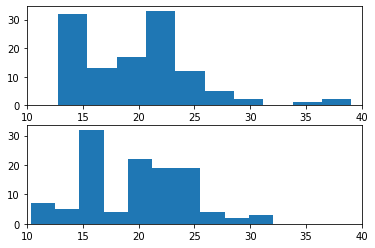

In [42]:
plt.figure()
plt.subplot(211)
plt.hist(mpg99)
plt.xlim(10,40)
plt.subplot(212)
plt.hist(mpg08)
plt.xlim(10,40)


In [45]:
#not that normal, but over 100 values each, so not as worried about normality
print(f'{len(mpg99)}, {len(mpg08)}')

117, 117


In [38]:
#check p of compared variance
stats.levene(mpg99,mpg08)[1]
#if p(levene) is > alpha, then we have equal variance

0.8514113361784937

In [63]:
t, p = stats.ttest_ind(mpg99,mpg08,equal_var=True)
stats_result(p,α,null_h)

The null hypothesis was: Manual cars get the same or worse city mpg

We accept the null hypothesis, p = 0.8030694941407983


(array([ 9., 12., 14.,  6.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([19.15, 21.03, 22.91, 24.79, 26.67, 28.55, 30.43, 32.31, 34.19,
        36.07, 37.95]),
 <BarContainer object of 10 artists>)

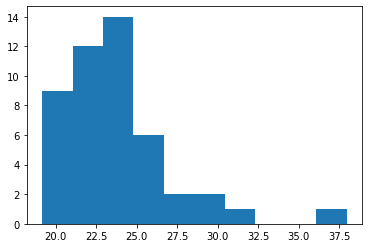

In [50]:
#2b) are compact cars more fuel-efficient than the average car. 
null_h = 'compact cars have the same combined mpg fuel-efficiency as the average car'
mpg_com = df.avg_mpg[df['class'] == 'compact']

plt.hist(mpg_com) #normalish, 50ish points

In [64]:

#diff sample sizes. let's check variance
tl, pl = stats.levene(mpg_com,df.cty)
print(f'p(levene) > α: {pl > α}')

p(levene) > α: False


In [65]:
#WRONG WAY
t, p = stats.ttest_ind(df.avg_mpg,mpg_com,equal_var=False)
stats_result(p,α,null_h)

The null hypothesis was: Manual cars get the same or worse city mpg

We reject the null hypothesis, p = 3.3910472293486603e-09


In [68]:
#2b - ALT - BETTER) Should be treating this as two separate samples 
#Probably should use one sample ttest

t, p = stats.ttest_1samp(mpg_com,df.avg_mpg.mean())
stats_result(p,α,null_h)



The null hypothesis was: Manual cars get the same or worse city mpg

We reject the null hypothesis, p = 6.133395124728956e-10


In [69]:
#2b - ALT - BEST). Should do one tail
#update null
null_h = 'compact cars have the same or less city mpg as the average car'

t, p = stats.ttest_1samp(mpg_com,df.avg_mpg.mean())
#get real p
p = p/2
stats_result(p,α,null_h)

The null hypothesis was: compact cars have the same or less city mpg as the average car

We reject the null hypothesis, p = 3.066697562364478e-10


(array([ 1., 10.,  8., 22., 23.,  6.,  4.,  1.,  0.,  2.]),
 array([10.35, 13.22, 16.09, 18.96, 21.83, 24.7 , 27.57, 30.44, 33.31,
        36.18, 39.05]),
 <BarContainer object of 10 artists>)

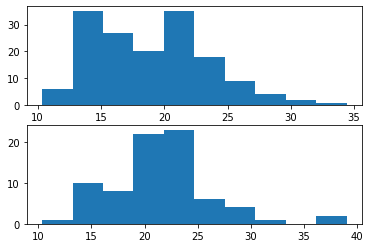

In [70]:
#2c) Do manual cars get better gas mileage than automatic cars
null_h = "Manual cars get the same or worse city mpg"

#break data into our two samples
mpgA = df.avg_mpg[df.trans.str.startswith('a')]
mpgM = df.avg_mpg[df.trans.str.startswith('m')]

plt.figure()
plt.subplot(211)
plt.hist(mpgA)
plt.subplot(212)
plt.hist(mpgM)

In [71]:
#normalish
#see if variance simliar
tl, pl = stats.levene(mpgA,mpgM)

t, p = stats.ttest_ind(mpgA,mpgM,equal_var = (pl > α))
#doing one tail, so immediately update p
p=p/2
stats_result(p,α,null_h)

The null hypothesis was: Manual cars get the same or worse city mpg

We reject the null hypothesis, p = 3.247026140700205e-06
